In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder ,MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer,RobustScaler,StandardScaler
from joblib import dump
import tensorflow as tf


In [2]:
ratings_df = pd.read_csv('data\\users-score-2023.csv')
anime_metadata_df = pd.read_csv('data\\anime-dataset-2023.csv')
user_df = pd.read_csv('data\\users-details-2023.csv')

In [3]:
user_df

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.6,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.8,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.0,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.0,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731285,1291083,Dolopa,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731286,1291085,alenrobnik,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,21.4,8.22,16.0,58.0,9.0,1.0,42.0,126.0,0.0,1239.0
731287,1291087,Oblongata,NaN,1993-01-30T00:00:00+00:00,NaN,2012-05-06T00:00:00+00:00,51.3,7.53,38.0,175.0,0.0,9.0,211.0,433.0,2.0,3010.0
731288,1291091,Etnota,NaN,NaN,NaN,2012-05-06T00:00:00+00:00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
user_df.drop(["Joined","Days Watched","Watching","Completed","On Hold","Dropped",	"Plan to Watch",	"Total Entries",	"Rewatched",	"Episodes Watched" , "Username", "Location"],axis=1,inplace=True)

In [5]:
user_df['age'] = pd.to_datetime(user_df['Birthday'],errors='coerce').apply(lambda x: 2024 - x.year)  # Convert birthday to age
user_df.drop(['Birthday'],axis=1,inplace=True)
user_df

,Mal ID,Gender,Mean Score,age
0,1,Male,7.37,39.0
1,3,Male,7.34,NaN
2,4,Female,6.68,NaN
3,9,NaN,7.71,NaN
4,18,NaN,6.27,NaN
...,...,...,...,...
731285,1291083,NaN,0.00,NaN
731286,1291085,NaN,8.22,NaN
731287,1291087,NaN,7.53,31.0
731288,1291091,NaN,0.00,NaN


In [6]:
# Calculate the mean of the column
mean_value_age = user_df['age'].mean()

# Fill missing values with the mean
user_df['age'].fillna(mean_value_age, inplace=True)

In [7]:
print(f"mean value of user age is {mean_value_age}")

mean value of user age is 33.691945637815515


In [8]:
user_df=user_df[user_df['Mean Score']!=0.00]
user_df=user_df[user_df['Mean Score'].notna()]
user_df

,Mal ID,Gender,Mean Score,age
0,1,Male,7.37,39.000000
1,3,Male,7.34,33.691946
2,4,Female,6.68,33.691946
3,9,NaN,7.71,33.691946
4,18,NaN,6.27,33.691946
...,...,...,...,...
731280,1291057,Male,7.00,27.000000
731284,1291079,Male,8.48,33.691946
731286,1291085,NaN,8.22,33.691946
731287,1291087,NaN,7.53,31.000000


In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355086 entries, 0 to 731289
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Mal ID      355086 non-null  int64  
 1   Gender      190695 non-null  object 
 2   Mean Score  355086 non-null  float64
 3   age         355086 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.5+ MB


In [10]:
# def convert_cat_to_one_hot(df,col,unknown_name):
#     df[col] = df[col].fillna(unknown_name)
#     one_hot_encoded = pd.get_dummies(df[col],dtype='int64')
    
#     # Concatenate the one-hot encoded gender columns with the original DataFrame
#     df = pd.concat([df, one_hot_encoded], axis=1)
#     df.drop([col],axis=1,inplace=True)
#     return df

In [11]:
# def sep_and_conv_cat_to_one_hot(df,col,unknown_name):
#     df[col] = df[col].fillna(unknown_name)
#     one_hot_encoded = df[col].str.get_dummies(', ')
    
#     # Concatenate the one-hot encoded gender columns with the original DataFrame
#     df = pd.concat([df, one_hot_encoded], axis=1)
#     df.drop([col],axis=1,inplace=True)
#     return df

In [12]:
# user_df=convert_cat_to_one_hot(user_df,'Gender','Unknown_Gender')

In [13]:
user_df['Gender'] = user_df['Gender'].fillna('Unknown_Gender')
gender_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',dtype='int64')  # Create an instance of OneHotEncoder
encoded_Types = gender_encoder.fit_transform(user_df[['Gender']])  # Fit and transform the column
encoded_df = pd.DataFrame(encoded_Types.toarray(), columns=gender_encoder.categories_[0],index=user_df.index)  # Create a DataFrame from the encoded columns

user_df=pd.concat([user_df, encoded_df], axis=1)  # Concatenate the original DataFrame with the encoded DataFrame
user_df.drop(['Gender'],axis=1,inplace=True)

In [14]:
dump(gender_encoder,'intermediate_data_all_embeddings/gender_encoder.pkl')

['intermediate_data_all_embeddings/gender_encoder.pkl']

In [15]:
user_df

,Mal ID,Mean Score,age,Female,Male,Non-Binary,Unknown_Gender
0,1,7.37,39.000000,0,1,0,0
1,3,7.34,33.691946,0,1,0,0
2,4,6.68,33.691946,1,0,0,0
3,9,7.71,33.691946,0,0,0,1
4,18,6.27,33.691946,0,0,0,1
...,...,...,...,...,...,...,...
731280,1291057,7.00,27.000000,0,1,0,0
731284,1291079,8.48,33.691946,0,1,0,0
731286,1291085,8.22,33.691946,0,0,0,1
731287,1291087,7.53,31.000000,0,0,0,1


In [16]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355086 entries, 0 to 731289
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Mal ID          355086 non-null  int64  
 1   Mean Score      355086 non-null  float64
 2   age             355086 non-null  float64
 3   Female          355086 non-null  int64  
 4   Male            355086 non-null  int64  
 5   Non-Binary      355086 non-null  int64  
 6   Unknown_Gender  355086 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 21.7 MB


##### normalizing mean score

In [17]:
mean_value_Score = user_df['Mean Score'].mean()
print(f"mean value of user Score is {mean_value_Score}")

mean value of user Score is 8.130747480891952


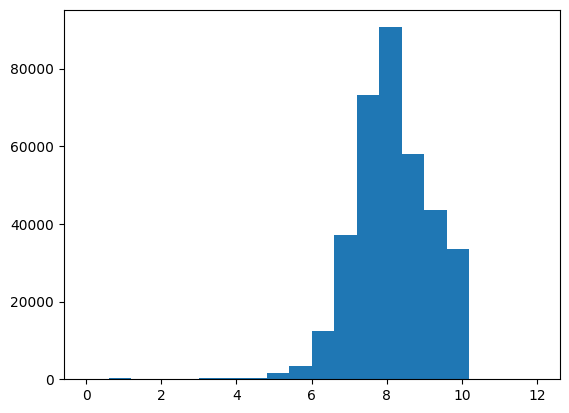

In [17]:
plt.hist(user_df['Mean Score'],range=(0,12),bins=20)
plt.show()


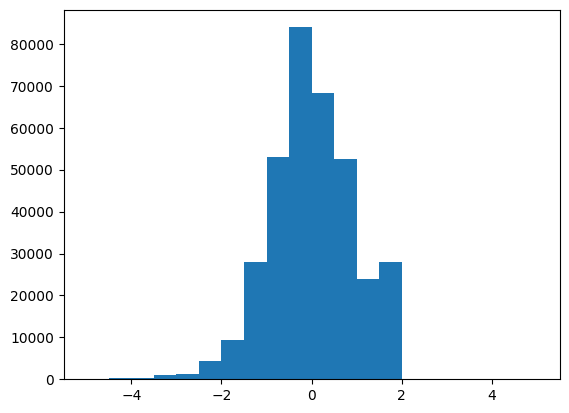

In [18]:
column_to_transform = user_df['Mean Score']
mean_score_transformer = PowerTransformer(method='yeo-johnson',standardize=True)

# Fit the transformer to the column and transform it
transformed_column = mean_score_transformer.fit_transform(column_to_transform.values.reshape(-1, 1))

# Convert the transformed array back to DataFrame (optional)

plt.hist(transformed_column,range=(-5,5),bins=20)
plt.show()
# Assign the transformed values back to the DataFrame
user_df['Mean Score'] = transformed_column

In [19]:

dump(mean_score_transformer, 'intermediate_data_all_embeddings/mean_score_scaler.pkl') #saving scaler for use in production

['intermediate_data_all_embeddings/mean_score_scaler.pkl']

In [20]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355086 entries, 0 to 731289
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Mal ID          355086 non-null  int64  
 1   Mean Score      355086 non-null  float64
 2   age             355086 non-null  float64
 3   Female          355086 non-null  int64  
 4   Male            355086 non-null  int64  
 5   Non-Binary      355086 non-null  int64  
 6   Unknown_Gender  355086 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 21.7 MB


In [21]:
user_df

,Mal ID,Mean Score,age,Female,Male,Non-Binary,Unknown_Gender
0,1,-0.696093,39.000000,0,1,0,0
1,3,-0.724716,33.691946,0,1,0,0
2,4,-1.363115,33.691946,1,0,0,0
3,9,-0.373963,33.691946,0,0,0,1
4,18,-1.768592,33.691946,0,0,0,1
...,...,...,...,...,...,...,...
731280,1291057,-1.051472,27.000000,0,1,0,0
731284,1291079,0.341001,33.691946,0,1,0,0
731286,1291085,0.101751,33.691946,0,0,0,1
731287,1291087,-0.543988,31.000000,0,0,0,1


##### normalizing rating

In [22]:
ratings_df

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8
...,...,...,...,...,...
24325186,1291087,Oblongata,10611,R-15,3
24325187,1291087,Oblongata,174,Tenjou Tenge,6
24325188,1291097,JuunanaSai,1535,Death Note,9
24325189,1291097,JuunanaSai,226,Elfen Lied,10


In [23]:
ratings_df.drop(['Username','Anime Title'],axis=1,inplace=True)
ratings_df

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8
...,...,...,...
24325186,1291087,10611,3
24325187,1291087,174,6
24325188,1291097,1535,9
24325189,1291097,226,10


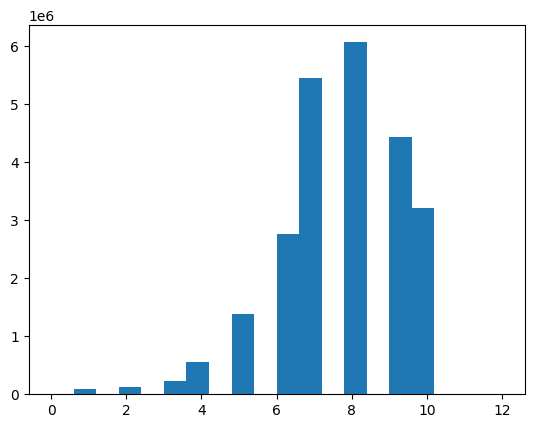

In [24]:
plt.hist(ratings_df['rating'],range=(0,12),bins=20)
plt.show()

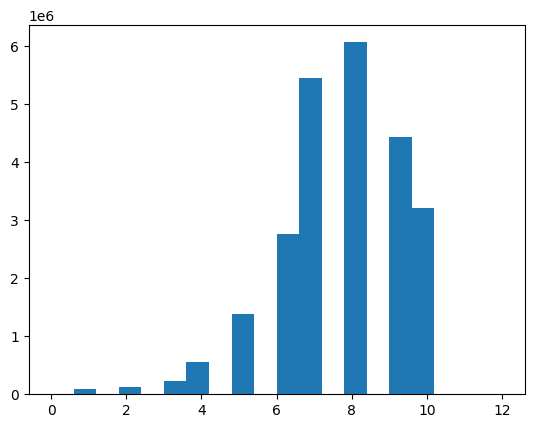

In [25]:
plt.hist(ratings_df['rating'],range=(0,12),bins=20)
plt.show()

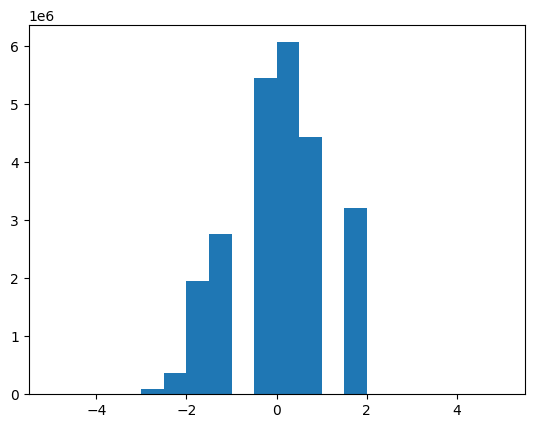

In [26]:
column_to_transform = ratings_df['rating']
rating_transformer = PowerTransformer(method='yeo-johnson',standardize=True)

# Fit the transformer to the column and transform it
transformed_column = rating_transformer.fit_transform(column_to_transform.values.reshape(-1, 1))

# Convert the transformed array back to DataFrame (optional)

plt.hist(transformed_column,range=(-5,5),bins=20)
plt.show()
# Assign the transformed values back to the DataFrame
ratings_df['rating'] = transformed_column

In [27]:
dump(rating_transformer, 'intermediate_data_all_embeddings/rating_scaler.pkl') #saving scaler for use in production

['intermediate_data_all_embeddings/rating_scaler.pkl']

In [28]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 556.8 MB


In [29]:
ratings_df

,user_id,anime_id,rating
0,1,21,0.851047
1,1,48,-0.494648
2,1,320,-1.522295
3,1,49,0.138087
4,1,304,0.138087
...,...,...,...
24325186,1291087,10611,-2.238624
24325187,1291087,174,-1.047849
24325188,1291097,1535,0.851047
24325189,1291097,226,1.644854


In [30]:
user_ratings_df = pd.merge(ratings_df, user_df, left_on='user_id' , right_on= 'Mal ID')
user_ratings_df.drop(['Mal ID'],axis=1,inplace=True)
user_ratings_df

,user_id,anime_id,rating,Mean Score,age,Female,Male,Non-Binary,Unknown_Gender
0,1,21,0.851047,-0.696093,39.000000,0,1,0,0
1,1,48,-0.494648,-0.696093,39.000000,0,1,0,0
2,1,320,-1.522295,-0.696093,39.000000,0,1,0,0
3,1,49,0.138087,-0.696093,39.000000,0,1,0,0
4,1,304,0.138087,-0.696093,39.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...
23803444,1291087,10611,-2.238624,-0.543988,31.000000,0,0,0,1
23803445,1291087,174,-1.047849,-0.543988,31.000000,0,0,0,1
23803446,1291097,1535,0.851047,1.410271,33.691946,1,0,0,0
23803447,1291097,226,1.644854,1.410271,33.691946,1,0,0,0


In [31]:
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803449 entries, 0 to 23803448
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   anime_id        int64  
 2   rating          float64
 3   Mean Score      float64
 4   age             float64
 5   Female          int64  
 6   Male            int64  
 7   Non-Binary      int64  
 8   Unknown_Gender  int64  
dtypes: float64(3), int64(6)
memory usage: 1.6 GB


In [32]:
anime_metadata_df

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,无脑魔女,UNKNOWN,"Comedy, Fantasy, Slice of Life",No description available for this anime.,ONA,15.0,"Jul 4, 2023 to ?",...,UNKNOWN,Web manga,Unknown,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1386/...
24901,55732,Bu Xing Si: Yuan Qi,Blader Soul,捕星司·源起,UNKNOWN,"Action, Adventure, Fantasy",No description available for this anime.,ONA,18.0,"Jul 27, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1383/...
24902,55733,Di Yi Xulie,The First Order,第一序列,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",No description available for this anime.,ONA,16.0,"Jul 19, 2023 to ?",...,UNKNOWN,Web novel,Unknown,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1130/...
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,僕らの最終戦争,UNKNOWN,UNKNOWN,A music video for the song Bokura no Saishuu S...,Music,1.0,"Apr 23, 2022",...,UNKNOWN,Original,3 min,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN,0,https://cdn.myanimelist.net/images/anime/1931/...


In [33]:
anime_metadata_df.drop(["Name",'English name','Other name','Synopsis','Premiered','Episodes','Duration','Rating','Popularity',	'Members',	'Favorites','Status','Scored By','Image URL'	,	'Licensors','Producers' , 'Aired' , 'Rank'],axis=1,inplace=True)

In [34]:
anime_metadata_df

,anime_id,Score,Genres,Type,Studios,Source
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise,Original
1,5,8.38,"Action, Sci-Fi",Movie,Bones,Original
2,6,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse,Manga
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise,Original
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation,Manga
...,...,...,...,...,...,...
24900,55731,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,UNKNOWN,Web manga
24901,55732,UNKNOWN,"Action, Adventure, Fantasy",ONA,UNKNOWN,Web novel
24902,55733,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,UNKNOWN,Web novel
24903,55734,UNKNOWN,UNKNOWN,Music,UNKNOWN,Original


In [35]:
anime_metadata_df=anime_metadata_df[~(anime_metadata_df['Score']=='UNKNOWN')]
anime_metadata_df

,anime_id,Score,Genres,Type,Studios,Source
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise,Original
1,5,8.38,"Action, Sci-Fi",Movie,Bones,Original
2,6,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse,Manga
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise,Original
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation,Manga
...,...,...,...,...,...,...
24590,55355,5.99,"Action, Comedy, Mystery",ONA,"HMCH, Gravity Well",Game
24635,55404,6.45,UNKNOWN,Music,UNKNOWN,Original
24729,55517,6.07,UNKNOWN,Special,CygamesPictures,Web manga
24831,55647,6.29,"Action, Adventure, Comedy, Fantasy",Special,UNKNOWN,Manga


In [36]:
column_name = 'Score'

# Convert the column to float
anime_metadata_df[column_name]=anime_metadata_df[column_name].astype(float)

C:\Users\aunno\AppData\Local\Temp\ipykernel_21908\2054710837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_metadata_df[column_name]=anime_metadata_df[column_name].astype(float)


In [37]:
#anime_metadata_df['Genres'] = anime_metadata_df['Genres'].fillna('')
#anime_metadata_df['sypnopsis'] = anime_metadata_df['sypnopsis'].fillna('')
#anime_metadata_df['Genres'] = anime_metadata_df['Genres'].apply(lambda x: x.split(','))
#anime_metadata_df['Genres'] = anime_metadata_df['Genres'].apply(lambda x: ' '.join(x))
#anime_metadata_df['sypnopsis'] = anime_metadata_df['sypnopsis'].apply(lambda x: len(x.split()))
#anime_metadata_df

In [38]:
unique_strings = anime_metadata_df['Type'].unique()

# Print the unique strings
print(unique_strings)

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music' 'UNKNOWN']


In [39]:
unique_strings = anime_metadata_df['Source'].unique()

# Print the unique strings
print(unique_strings)

['Original' 'Manga' 'Light novel' 'Game' 'Visual novel' '4-koma manga'
 'Novel' 'Other' 'Unknown' 'Picture book' 'Web manga' 'Music' 'Radio'
 'Book' 'Mixed media' 'Card game' 'Web novel']


In [40]:
# anime_metadata_df['Type'] = anime_metadata_df['Type'].replace('Unknown', 'Unknown_Type')
# anime_metadata_df['Source'] = anime_metadata_df['Source'].replace('Unknown', 'Unknown_Source')
# anime_metadata_df['Genres'] = anime_metadata_df['Genres'].replace('Unknown', 'Unknown_Genre')
# anime_metadata_df['Source'] = anime_metadata_df['Source'].replace('Music', 'Music_Source')
# anime_metadata_df['Source'] = anime_metadata_df['Source'].replace('Game', 'Game_Source')
# anime_metadata_df['Type'] = anime_metadata_df['Type'].replace('Music', 'Music_Type')

In [41]:
# # Define the strings you want to remove
# string_to_remove = 'Music'

# # Remove rows where 'apple' or 'orange' appears in 'col2'
# anime_metadata_df  = anime_metadata_df[anime_metadata_df['Type'] != string_to_remove]

In [42]:
anime_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15692 entries, 0 to 24856
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  15692 non-null  int64  
 1   Score     15692 non-null  float64
 2   Genres    15692 non-null  object 
 3   Type      15692 non-null  object 
 4   Studios   15692 non-null  object 
 5   Source    15692 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 858.2+ KB


In [43]:
anime_metadata_df

,anime_id,Score,Genres,Type,Studios,Source
0,1,8.75,"Action, Award Winning, Sci-Fi",TV,Sunrise,Original
1,5,8.38,"Action, Sci-Fi",Movie,Bones,Original
2,6,8.22,"Action, Adventure, Sci-Fi",TV,Madhouse,Manga
3,7,7.25,"Action, Drama, Mystery, Supernatural",TV,Sunrise,Original
4,8,6.94,"Adventure, Fantasy, Supernatural",TV,Toei Animation,Manga
...,...,...,...,...,...,...
24590,55355,5.99,"Action, Comedy, Mystery",ONA,"HMCH, Gravity Well",Game
24635,55404,6.45,UNKNOWN,Music,UNKNOWN,Original
24729,55517,6.07,UNKNOWN,Special,CygamesPictures,Web manga
24831,55647,6.29,"Action, Adventure, Comedy, Fantasy",Special,UNKNOWN,Manga


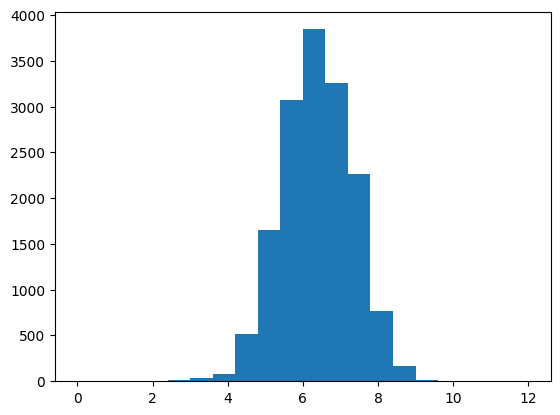

In [44]:
plt.hist(anime_metadata_df['Score'],range=(0,12),bins=20)
plt.show()

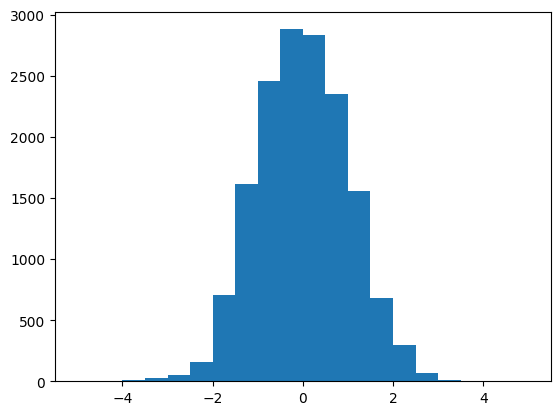

C:\Users\aunno\AppData\Local\Temp\ipykernel_21908\2965886338.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_metadata_df['Score'] = transformed_column


In [45]:
column_to_transform = anime_metadata_df['Score']
score_transformer = PowerTransformer(method='yeo-johnson',standardize=True)

# Fit the transformer to the column and transform it
transformed_column = score_transformer.fit_transform(column_to_transform.values.reshape(-1, 1))

# Convert the transformed array back to DataFrame (optional)

plt.hist(transformed_column,range=(-5,5),bins=20)
plt.show()
# Assign the transformed values back to the DataFrame
anime_metadata_df['Score'] = transformed_column

In [46]:
dump(score_transformer, 'intermediate_data_all_embeddings/score_scaler.pkl') #saving scaler for use in production

['intermediate_data_all_embeddings/score_scaler.pkl']

In [47]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating    float64
dtypes: float64(1), int64(2)
memory usage: 556.8 MB


In [48]:
Type_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',dtype='int64')  # Create an instance of OneHotEncoder
encoded_Types = Type_encoder.fit_transform(anime_metadata_df[['Type']])  # Fit and transform the column
encoded_df = pd.DataFrame(encoded_Types.toarray(), columns=Type_encoder.categories_[0],index=anime_metadata_df.index)  # Create a DataFrame from the encoded columns

anime_metadata_df=pd.concat([anime_metadata_df, encoded_df], axis=1)  # Concatenate the original DataFrame with the encoded DataFrame
anime_metadata_df.drop(['Type'],axis=1,inplace=True)


In [49]:
# Source_encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',dtype='int64')  # Create an instance of OneHotEncoder
# encoded_Sources = Source_encoder.fit_transform(anime_metadata_df[['Source']])  # Fit and transform the column
# encoded_df = pd.DataFrame(encoded_Sources.toarray(), columns=Source_encoder.categories_[0])  # Create a DataFrame from the encoded columns

# anime_metadata_df=pd.concat([anime_metadata_df, encoded_df], axis=1)  # Concatenate the original DataFrame with the encoded DataFrame
# anime_metadata_df.drop(['Source'],axis=1,inplace=True)

In [50]:
# genre_encoder = MultiLabelBinarizer()
# encoded_genres=genre_encoder.fit_transform(anime_metadata_df['Genres'].str.split(", "))
# encoded_df = pd.DataFrame(encoded_genres, columns=genre_encoder.classes_)  # Create a DataFrame from the encoded columns

# anime_metadata_df=pd.concat([anime_metadata_df, encoded_df], axis=1)  # Concatenate the original DataFrame with the encoded DataFrame
# anime_metadata_df.drop(['Genres'],axis=1,inplace=True)


#### saving encoders for use in production

In [51]:
dump(Type_encoder,'intermediate_data_all_embeddings/Type_encoder.pkl')
# dump(Source_encoder,'Source_encoder.pkl')
# dump(genre_encoder,'genre_encoder.pkl')

['intermediate_data_all_embeddings/Type_encoder.pkl']

In [52]:
# anime_metadata_df=sep_and_conv_cat_to_one_hot(anime_metadata_df,'Genres','Unknown_Genre')
# anime_metadata_df=convert_cat_to_one_hot(anime_metadata_df,'Type','Unknown_Type')
# anime_metadata_df=convert_cat_to_one_hot(anime_metadata_df,'Source','Unknown_Source')

In [53]:
anime_metadata_df

,anime_id,Score,Genres,Studios,Source,Movie,Music,ONA,OVA,Special,TV,UNKNOWN
0,1,2.657709,"Action, Award Winning, Sci-Fi",Sunrise,Original,0,0,0,0,0,1,0
1,5,2.225083,"Action, Sci-Fi",Bones,Original,1,0,0,0,0,0,0
2,6,2.039589,"Action, Adventure, Sci-Fi",Madhouse,Manga,0,0,0,0,0,1,0
3,7,0.936342,"Action, Drama, Mystery, Supernatural",Sunrise,Original,0,0,0,0,0,1,0
4,8,0.591776,"Adventure, Fantasy, Supernatural",Toei Animation,Manga,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,-0.438364,"Action, Comedy, Mystery","HMCH, Gravity Well",Game,0,0,1,0,0,0,0
24635,55404,0.055466,UNKNOWN,UNKNOWN,Original,0,1,0,0,0,0,0
24729,55517,-0.353170,UNKNOWN,CygamesPictures,Web manga,0,0,0,0,1,0,0
24831,55647,-0.117382,"Action, Adventure, Comedy, Fantasy",UNKNOWN,Manga,0,0,0,0,1,0,0


In [54]:
anime_metadata_df.columns

Index(['anime_id', 'Score', 'Genres', 'Studios', 'Source', 'Movie', 'Music',
       'ONA', 'OVA', 'Special', 'TV', 'UNKNOWN'],
      dtype='object')

In [55]:

uniqueList = []
duplicateList = []
 
for i in anime_metadata_df.columns:
    if i not in uniqueList:
        uniqueList.append(i)
    elif i not in duplicateList:
        duplicateList.append(i)
 
print(duplicateList)

[]


In [56]:
# studio_to_int = {}
# int_to_studio = {}
# index = 1
# for studios in anime_metadata_df['Studios'].str.split(', '):
#     for studio in studios:
#         if studio not in studio_to_int:
#             studio_to_int[studio] = index
#             int_to_studio[index] = studio
#             index += 1

# # Convert studio names to sequences of integers
# sequences = []
# for studios in anime_metadata_df['Studios'].str.split(', '):
#     sequence = [studio_to_int[studio] for studio in studios]
#     sequences.append(sequence)

# max_length = max(len(lst) for lst in sequences)
# padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')
# padded_columns = pd.DataFrame(padded_sequences, columns=[f'studio_col_{i+1}' for i in range(max_length)])
# anime_metadata_df=pd.concat([anime_metadata_df,padded_columns],axis=1)
# anime_metadata_df.drop('Studios',axis=1,inplace=True)

In [57]:
# genre_to_int = {}
# int_to_genre = {}
# index = 0
# for genres in anime_metadata_df['Genres'].str.split(', '):
#     for genre in genres:
#         if genre not in genre_to_int:
#             genre_to_int[genre] = index
#             int_to_genre[index] = genre
#             index += 1

# # Convert studio names to sequences of integers
# sequences = []
# for genres in anime_metadata_df['Genres'].str.split(', '):
#     sequence = [genre_to_int[genre] for genre in genres]
#     sequences.append(sequence)

# max_length = max(len(lst) for lst in sequences)
# padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')
# padded_columns = pd.DataFrame(padded_sequences, columns=[f'genre_col_{i+1}' for i in range(max_length)])
# anime_metadata_df=pd.concat([anime_metadata_df,padded_columns],axis=1)
# anime_metadata_df.drop('Genres',axis=1,inplace=True)

In [58]:
# source_to_int = {}
# int_to_source = {}
# index = 0
# for sources in anime_metadata_df['Source'].str.split(', '):
#     for source in sources:
#         if source not in source_to_int:
#             source_to_int[source] = index
#             int_to_source[index] = source
#             index += 1

# # Convert studio names to sequences of integers
# sequences = []
# for sources in anime_metadata_df['Source'].str.split(', '):
#     sequence = [source_to_int[source] for source in sources]
#     sequences.append(sequence)

# max_length = max(len(lst) for lst in sequences)
# padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')
# padded_columns = pd.DataFrame(padded_sequences, columns=[f'source_col_{i+1}' for i in range(max_length)])
# anime_metadata_df=pd.concat([anime_metadata_df,padded_columns],axis=1)
# anime_metadata_df.drop('Source',axis=1,inplace=True)

In [59]:
anime_metadata_df['Studios']=anime_metadata_df['Studios'].replace('UNKNOWN','')
anime_metadata_df['Genres']=anime_metadata_df['Genres'].replace('UNKNOWN','')
anime_metadata_df['Source']=anime_metadata_df['Source'].replace('UNKNOWN','')

In [60]:
@tf.keras.utils.register_keras_serializable()
def split_func(input_str):
  return tf.strings.split(input_str, sep=", ")

In [61]:
studio_vectorize_layer=tf.keras.layers.TextVectorization(max_tokens=1000,output_mode='int',split=split_func,standardize=None)

# Fit on the data
studio_vectorize_layer.adapt(anime_metadata_df['Studios'].values)

# Transform genres into sequences of indices
sequences = studio_vectorize_layer(anime_metadata_df['Studios'].values)

max_length = max(len(seq) for seq in sequences)
# Pad sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Create separate columns for each index in the sequence
for i in range(max_length):
    anime_metadata_df[f'Studio_Index_{i+1}'] = padded_sequences[:, i]

anime_metadata_df.drop('Studios', axis=1, inplace=True)

In [64]:
studio_vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'Toei Animation',
 'Sunrise',
 'J.C.Staff',
 'Madhouse',
 'Production I.G',
 'Studio Deen',
 'TMS Entertainment',
 'Pierrot',
 'OLM',
 'A-1 Pictures',
 'AIC',
 'Shin-Ei Animation',
 'Nippon Animation',
 'Tatsunoko Production',
 'Xebec',
 'Bones',
 'Shaft',
 'Gonzo',
 'T-Rex',
 'Kyoto Animation',
 'SILVER LINK.',
 'Arms',
 'Satelight',
 "Brain's Base",
 'DLE',
 'Seven',
 'Doga Kobo',
 'LIDENFILMS',
 'Group TAC',
 'Y.O.U.C',
 'Gainax',
 'Zexcs',
 'MAPPA',
 'Wit Studio',
 'feel.',
 'ufotable',
 'Studio 4°C',
 'Ashi Productions',
 'Studio 9 Maiami',
 'Gallop',
 'Tokyo Movie Shinsha',
 'Tezuka Productions',
 'PoRO',
 'Magic Bus',
 'Lerche',
 'SANZIGEN',
 'P.A. Works',
 'Kinema Citrus',
 'TNK',
 'Haoliners Animation League',
 'CloverWorks',
 'Actas',
 'AQUA ARIS',
 '8bit',
 'Studio Ghibli',
 'Diomedéa',
 'Bandai Namco Pictures',
 'Studio Hibari',
 'animate Film',
 'Ajia-do',
 'Studio 1st',
 'Studio Comet',
 'Anime Antenna Iinkai',
 'White Fox',
 'David Production',
 'Artland'

In [65]:
genre_vectorize_layer=tf.keras.layers.TextVectorization(max_tokens=1000,output_mode='int',split=split_func,standardize=None)

# Fit on the data

genre_vectorize_layer.adapt(anime_metadata_df['Genres'].values)
# Transform genres into sequences of indices
sequences = genre_vectorize_layer(anime_metadata_df['Genres'].values)

max_length = max(len(seq) for seq in sequences)
# Pad sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Create separate columns for each index in the sequence
for i in range(max_length):
    anime_metadata_df[f'Genre_Index_{i+1}'] = padded_sequences[:, i]

anime_metadata_df.drop('Genres', axis=1, inplace=True)

In [66]:
genre_vectorize_layer.get_vocabulary()[12]

'Ecchi'

In [67]:
genre_vectorize_layer('Action, Slice of Life')

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 3, 11], dtype=int64)>

In [68]:
genre_vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'Comedy',
 'Action',
 'Fantasy',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Hentai',
 'Supernatural',
 'Slice of Life',
 'Ecchi',
 'Mystery',
 'Sports',
 'Avant Garde',
 'Horror',
 'Award Winning',
 'Suspense',
 'Boys Love',
 'Gourmet',
 'Girls Love',
 'Erotica']

In [69]:
source_vectorize_layer=tf.keras.layers.TextVectorization(max_tokens=1000,output_mode='int',split=split_func,standardize=None)

# Fit on the data
source_vectorize_layer.adapt(anime_metadata_df['Source'].values)

# Transform genres into sequences of indices
sequences = source_vectorize_layer(anime_metadata_df['Source'].values)

max_length = max(len(seq) for seq in sequences)
# Pad sequences
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post')

# Create separate columns for each index in the sequence
for i in range(max_length):
    anime_metadata_df[f'Source_Index_{i+1}'] = padded_sequences[:, i]

anime_metadata_df.drop('Source', axis=1, inplace=True)

In [70]:
source_vectorize_layer.get_vocabulary()

['',
 '[UNK]',
 'Original',
 'Manga',
 'Unknown',
 'Visual novel',
 'Game',
 'Light novel',
 'Novel',
 'Other',
 'Web manga',
 'Music',
 '4-koma manga',
 'Mixed media',
 'Book',
 'Card game',
 'Picture book',
 'Web novel',
 'Radio']

In [71]:
anime_metadata_df

,anime_id,Score,Movie,Music,ONA,OVA,Special,TV,UNKNOWN,Studio_Index_1,...,Genre_Index_1,Genre_Index_2,Genre_Index_3,Genre_Index_4,Genre_Index_5,Genre_Index_6,Genre_Index_7,Genre_Index_8,Genre_Index_9,Source_Index_1
0,1,2.657709,0,0,0,0,0,1,0,3,...,3,17,6,0,0,0,0,0,0,2
1,5,2.225083,1,0,0,0,0,0,0,17,...,3,6,0,0,0,0,0,0,0,2
2,6,2.039589,0,0,0,0,0,1,0,5,...,3,5,6,0,0,0,0,0,0,3
3,7,0.936342,0,0,0,0,0,1,0,3,...,3,7,13,10,0,0,0,0,0,2
4,8,0.591776,0,0,0,0,0,1,0,2,...,5,4,10,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24590,55355,-0.438364,0,0,1,0,0,0,0,255,...,3,2,13,0,0,0,0,0,0,6
24635,55404,0.055466,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
24729,55517,-0.353170,0,0,0,0,1,0,0,259,...,0,0,0,0,0,0,0,0,0,10
24831,55647,-0.117382,0,0,0,0,1,0,0,0,...,3,5,2,4,0,0,0,0,0,3


#### saving vocabularies for use in production

In [72]:
# dump(studio_to_int,'intermediate_data_all_embeddings/studio_to_int_vocab_dict.pkl')
# dump(int_to_studio,'intermediate_data_all_embeddings/int_to_studio_vocab_dict.pkl')
# dump ({'config': studio_vectorizer.get_config(),'weights': studio_vectorizer.get_weights()},'intermediate_data_all_embeddings/studio_vectorizer.pkl')

studio_vectorize_layer_model = tf.keras.models.Sequential()
studio_vectorize_layer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
studio_vectorize_layer_model.add(studio_vectorize_layer)
studio_vectorize_layer_model.save('intermediate_data_all_embeddings/studio_vectorize_layer_model',save_format='tf')

INFO:tensorflow:Assets written to: intermediate_data_all_embeddings/studio_vectorize_layer_model\assets


In [73]:
# dump(genre_to_int,'intermediate_data_all_embeddings/genre_to_int_vocab_dict.pkl')
# dump(int_to_genre,'intermediate_data_all_embeddings/int_to_genre_vocab_dict.pkl')
#dump ({'config': genre_vectorizer.get_config(),'weights': genre_vectorizer.get_weights()},'intermediate_data_all_embeddings/genre_vectorizer.pkl')

genre_vectorize_layer_model = tf.keras.models.Sequential()
genre_vectorize_layer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
genre_vectorize_layer_model.add(genre_vectorize_layer)
genre_vectorize_layer_model.save('intermediate_data_all_embeddings/genre_vectorize_layer_model',save_format='tf')

INFO:tensorflow:Assets written to: intermediate_data_all_embeddings/genre_vectorize_layer_model\assets


In [74]:
# dump(source_to_int,'intermediate_data_all_embeddings/source_to_int_vocab_dict.pkl')
# dump(int_to_source,'intermediate_data_all_embeddings/int_to_source_vocab_dict.pkl')
# dump ({'config': source_vectorizer.get_config(),'weights': source_vectorizer.get_weights()},'intermediate_data_all_embeddings/source_vectorizer.pkl')
source_vectorize_layer_model = tf.keras.models.Sequential()
source_vectorize_layer_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
source_vectorize_layer_model.add(source_vectorize_layer)
source_vectorize_layer_model.save('intermediate_data_all_embeddings/source_vectorize_layer_model',save_format='tf')

INFO:tensorflow:Assets written to: intermediate_data_all_embeddings/source_vectorize_layer_model\assets


In [75]:
anime_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15692 entries, 0 to 24856
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         15692 non-null  int64  
 1   Score            15692 non-null  float64
 2   Movie            15692 non-null  int64  
 3   Music            15692 non-null  int64  
 4   ONA              15692 non-null  int64  
 5   OVA              15692 non-null  int64  
 6   Special          15692 non-null  int64  
 7   TV               15692 non-null  int64  
 8   UNKNOWN          15692 non-null  int64  
 9   Studio_Index_1   15692 non-null  int32  
 10  Studio_Index_2   15692 non-null  int32  
 11  Studio_Index_3   15692 non-null  int32  
 12  Studio_Index_4   15692 non-null  int32  
 13  Studio_Index_5   15692 non-null  int32  
 14  Studio_Index_6   15692 non-null  int32  
 15  Studio_Index_7   15692 non-null  int32  
 16  Studio_Index_8   15692 non-null  int32  
 17  Studio_Index_9   

## saving processed data

In [76]:
user_ratings_df.to_pickle("intermediate_data_all_embeddings/user_rating_df_temp.pkl")
anime_metadata_df.to_pickle("intermediate_data_all_embeddings/anime_metadata_df_temp.pkl")

## downcasting data to save space

In [2]:
user_ratings_df=pd.read_pickle("intermediate_data_all_embeddings/user_rating_df_temp.pkl")
anime_metadata_df=pd.read_pickle("intermediate_data_all_embeddings/anime_metadata_df_temp.pkl")

In [77]:
user_ratings_df

,user_id,anime_id,rating,Mean Score,age,Female,Male,Non-Binary,Unknown_Gender
0,1,21,0.851047,-0.696093,39.000000,0,1,0,0
1,1,48,-0.494648,-0.696093,39.000000,0,1,0,0
2,1,320,-1.522295,-0.696093,39.000000,0,1,0,0
3,1,49,0.138087,-0.696093,39.000000,0,1,0,0
4,1,304,0.138087,-0.696093,39.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...
23803444,1291087,10611,-2.238624,-0.543988,31.000000,0,0,0,1
23803445,1291087,174,-1.047849,-0.543988,31.000000,0,0,0,1
23803446,1291097,1535,0.851047,1.410271,33.691946,1,0,0,0
23803447,1291097,226,1.644854,1.410271,33.691946,1,0,0,0


In [78]:
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803449 entries, 0 to 23803448
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   anime_id        int64  
 2   rating          float64
 3   Mean Score      float64
 4   age             float64
 5   Female          int64  
 6   Male            int64  
 7   Non-Binary      int64  
 8   Unknown_Gender  int64  
dtypes: float64(3), int64(6)
memory usage: 1.6 GB


#### function to downcast a dataframe

In [79]:
def downcast_df(df):
    # Downcast int columns to float types
    int_cols = df.select_dtypes(include=['int']).columns
    df[int_cols] = df[int_cols].apply(pd.to_numeric, downcast='integer')

    # Downcast float columns to float types
    float_cols = df.select_dtypes(include=['float']).columns
    df[float_cols] = df[float_cols].apply(pd.to_numeric, downcast='float')

In [80]:
downcast_df(user_ratings_df)
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803449 entries, 0 to 23803448
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int32  
 1   anime_id        int32  
 2   rating          float32
 3   Mean Score      float32
 4   age             float32
 5   Female          int8   
 6   Male            int8   
 7   Non-Binary      int8   
 8   Unknown_Gender  int8   
dtypes: float32(3), int32(2), int8(4)
memory usage: 544.8 MB


In [81]:
anime_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15692 entries, 0 to 24856
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         15692 non-null  int64  
 1   Score            15692 non-null  float64
 2   Movie            15692 non-null  int64  
 3   Music            15692 non-null  int64  
 4   ONA              15692 non-null  int64  
 5   OVA              15692 non-null  int64  
 6   Special          15692 non-null  int64  
 7   TV               15692 non-null  int64  
 8   UNKNOWN          15692 non-null  int64  
 9   Studio_Index_1   15692 non-null  int32  
 10  Studio_Index_2   15692 non-null  int32  
 11  Studio_Index_3   15692 non-null  int32  
 12  Studio_Index_4   15692 non-null  int32  
 13  Studio_Index_5   15692 non-null  int32  
 14  Studio_Index_6   15692 non-null  int32  
 15  Studio_Index_7   15692 non-null  int32  
 16  Studio_Index_8   15692 non-null  int32  
 17  Studio_Index_9   

In [82]:
downcast_df(anime_metadata_df)

##### since anime_metadata_df has too many columns,  sometimes using the downcast function returns a weird error. Hence I have provided code to downcast it manually

In [83]:
# int_cols = anime_metadata_df.select_dtypes(include=['int64']).columns
# int_cols

In [84]:
# for i in range(len(int_cols)):
#     anime_metadata_df[int_cols[i]] = anime_metadata_df[int_cols[i]].apply(pd.to_numeric,downcast='integer')

In [85]:
# anime_metadata_df[int_cols[0]] = anime_metadata_df[int_cols[0]].apply(pd.to_numeric,downcast='integer')

In [86]:
# for i in range(len(int_cols)):
#     anime_metadata_df[int_cols[i]] = pd.to_numeric(anime_metadata_df[int_cols[i]] , downcast='integer')

In [87]:
# float_cols = anime_metadata_df.select_dtypes(include=['float']).columns
# float_cols

In [88]:
# for i in range(len(float_cols)):
#     anime_metadata_df[float_cols[i]] = pd.to_numeric(anime_metadata_df[float_cols[i]] , downcast='float')

In [89]:
# anime_metadata_df[int_cols[0]] = pd.to_numeric(anime_metadata_df[int_cols[0]] , downcast='integer')

In [90]:
# for col in int_cols:
#     anime_metadata_df[col] = anime_metadata_df[col].apply(pd.to_numeric,downcast='integer')


In [91]:
anime_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15692 entries, 0 to 24856
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         15692 non-null  int32  
 1   Score            15692 non-null  float32
 2   Movie            15692 non-null  int8   
 3   Music            15692 non-null  int8   
 4   ONA              15692 non-null  int8   
 5   OVA              15692 non-null  int8   
 6   Special          15692 non-null  int8   
 7   TV               15692 non-null  int8   
 8   UNKNOWN          15692 non-null  int8   
 9   Studio_Index_1   15692 non-null  int16  
 10  Studio_Index_2   15692 non-null  int16  
 11  Studio_Index_3   15692 non-null  int16  
 12  Studio_Index_4   15692 non-null  int16  
 13  Studio_Index_5   15692 non-null  int16  
 14  Studio_Index_6   15692 non-null  int16  
 15  Studio_Index_7   15692 non-null  int16  
 16  Studio_Index_8   15692 non-null  int16  
 17  Studio_Index_9   

## saving downcasted data

In [92]:
anime_metadata_df.to_pickle("intermediate_data_all_embeddings/anime_metadata_df_downcasted.pkl")
user_ratings_df.to_pickle("intermediate_data_all_embeddings/user_rating_df_downcasted.pkl")

# merging the user and anime tables to get final table

In [2]:
anime_metadata_df=pd.read_pickle("intermediate_data_all_embeddings/anime_metadata_df_downcasted.pkl")
user_ratings_df=pd.read_pickle("intermediate_data_all_embeddings/user_rating_df_downcasted.pkl")

In [3]:
user_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23803449 entries, 0 to 23803448
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int32  
 1   anime_id        int32  
 2   rating          float32
 3   Mean Score      float32
 4   age             float32
 5   Female          int8   
 6   Male            int8   
 7   Non-Binary      int8   
 8   Unknown_Gender  int8   
dtypes: float32(3), int32(2), int8(4)
memory usage: 544.8 MB


In [4]:
anime_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15692 entries, 0 to 24856
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         15692 non-null  int32  
 1   Score            15692 non-null  float32
 2   Movie            15692 non-null  int8   
 3   Music            15692 non-null  int8   
 4   ONA              15692 non-null  int8   
 5   OVA              15692 non-null  int8   
 6   Special          15692 non-null  int8   
 7   TV               15692 non-null  int8   
 8   UNKNOWN          15692 non-null  int8   
 9   Studio_Index_1   15692 non-null  int16  
 10  Studio_Index_2   15692 non-null  int16  
 11  Studio_Index_3   15692 non-null  int16  
 12  Studio_Index_4   15692 non-null  int16  
 13  Studio_Index_5   15692 non-null  int16  
 14  Studio_Index_6   15692 non-null  int16  
 15  Studio_Index_7   15692 non-null  int16  
 16  Studio_Index_8   15692 non-null  int16  
 17  Studio_Index_9   

In [5]:

merged_df = pd.merge(user_ratings_df, anime_metadata_df, on='anime_id')

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23793954 entries, 0 to 23793953
Data columns (total 37 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int32  
 1   anime_id         int32  
 2   rating           float32
 3   Mean Score       float32
 4   age              float32
 5   Female           int8   
 6   Male             int8   
 7   Non-Binary       int8   
 8   Unknown_Gender   int8   
 9   Score            float32
 10  Movie            int8   
 11  Music            int8   
 12  ONA              int8   
 13  OVA              int8   
 14  Special          int8   
 15  TV               int8   
 16  UNKNOWN          int8   
 17  Studio_Index_1   int16  
 18  Studio_Index_2   int16  
 19  Studio_Index_3   int16  
 20  Studio_Index_4   int16  
 21  Studio_Index_5   int16  
 22  Studio_Index_6   int16  
 23  Studio_Index_7   int16  
 24  Studio_Index_8   int16  
 25  Studio_Index_9   int16  
 26  Studio_Index_10  int16  
 27  Genre_Inde

In [7]:
merged_df.to_pickle("intermediate_data_all_embeddings/merged_final.pkl")

In [2]:
merged_df=pd.read_pickle("intermediate_data_all_embeddings/merged_final.pkl")

In [8]:
merged_df

,user_id,anime_id,rating,Mean Score,age,Female,Male,Non-Binary,Unknown_Gender,Score,...,Genre_Index_1,Genre_Index_2,Genre_Index_3,Genre_Index_4,Genre_Index_5,Genre_Index_6,Genre_Index_7,Genre_Index_8,Genre_Index_9,Source_Index_1
0,1,21,0.851047,-0.696093,39.000000,0,1,0,0,2.587209,...,3,5,4,0,0,0,0,0,0,3
1,20,21,0.851047,-0.046559,36.000000,0,1,0,0,2.587209,...,3,5,4,0,0,0,0,0,0,3
2,23,21,-0.494648,-0.657979,36.000000,0,0,0,1,2.587209,...,3,5,4,0,0,0,0,0,0,3
3,70,21,0.138087,-0.877939,41.000000,0,1,0,0,2.587209,...,3,5,4,0,0,0,0,0,0,3
4,83,21,0.851047,0.550890,33.691944,0,1,0,0,2.587209,...,3,5,4,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793949,1268459,40702,-1.522295,-2.426887,33.691944,1,0,0,0,-0.964035,...,0,0,0,0,0,0,0,0,0,11
23793950,1268459,40616,-1.522295,-2.426887,33.691944,1,0,0,0,-1.026311,...,11,0,0,0,0,0,0,0,0,2
23793951,1279855,37671,-1.522295,-1.868595,33.000000,0,1,0,0,-1.036673,...,11,0,0,0,0,0,0,0,0,10
23793952,1287253,10241,-2.238624,-1.471203,33.691944,0,0,0,1,-0.901584,...,2,0,0,0,0,0,0,0,0,4


In [9]:
merged_npy=merged_df.to_numpy(dtype='float32')

In [10]:
merged_npy

array([[ 1.0000000e+00,  2.1000000e+01,  8.5104680e-01, ...,
         0.0000000e+00,  0.0000000e+00,  3.0000000e+00],
       [ 2.0000000e+01,  2.1000000e+01,  8.5104680e-01, ...,
         0.0000000e+00,  0.0000000e+00,  3.0000000e+00],
       [ 2.3000000e+01,  2.1000000e+01, -4.9464756e-01, ...,
         0.0000000e+00,  0.0000000e+00,  3.0000000e+00],
       ...,
       [ 1.2798550e+06,  3.7671000e+04, -1.5222951e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+01],
       [ 1.2872530e+06,  1.0241000e+04, -2.2386239e+00, ...,
         0.0000000e+00,  0.0000000e+00,  4.0000000e+00],
       [ 1.2872530e+06,  7.6250000e+03, -2.4828031e+00, ...,
         0.0000000e+00,  0.0000000e+00,  4.0000000e+00]], dtype=float32)

In [11]:
merged_npy.shape

(23793954, 37)

In [12]:
merged_npy.nbytes

3521505192

In [13]:
np.save('intermediate_data_all_embeddings/merged.npy',merged_npy)